In [1]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import time
import datetime
import pyart
%matplotlib inline 

In [64]:
hrrr_dap = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/wrfprs')
hrrr_dap_sfc = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [65]:
print(hrrr_dap.dimensions)

OrderedDict([(u'isobaric', <type 'netCDF4.Dimension'>: name = 'isobaric', size = 40
), (u'reftime', <type 'netCDF4.Dimension'>: name = 'reftime', size = 61
), (u'time', <type 'netCDF4.Dimension'>: name = 'time', size = 23
), (u'x', <type 'netCDF4.Dimension'>: name = 'x', size = 1799
), (u'y', <type 'netCDF4.Dimension'>: name = 'y', size = 1059
)])


In [7]:
print(hrrr_dap_sfc.variables['time'])
print(hrrr_dap_sfc.variables['time'][-1])
for dt in netCDF4.num2date(hrrr_dap_sfc.variables['time'][-1], hrrr_dap_sfc.variables['time'].units):
    print(dt)
datetime.datetime.utcnow().strftime("%a %b %d %H:%M:%S %Z %Y")


<type 'netCDF4.Variable'>
float64 time(reftime, time)
    units: Hour since 2015-06-26T00:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (86, 15)
filling off

[  85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   99.  100.]
2015-06-29 13:00:00
2015-06-29 14:00:00
2015-06-29 15:00:00
2015-06-29 16:00:00
2015-06-29 17:00:00
2015-06-29 18:00:00
2015-06-29 19:00:00
2015-06-29 20:00:00
2015-06-29 21:00:00
2015-06-29 22:00:00
2015-06-29 23:00:00
2015-06-30 00:00:00
2015-06-30 01:00:00
2015-06-30 03:00:00
2015-06-30 04:00:00


'Mon Jun 29 14:32:03  2015'

<matplotlib.colorbar.Colorbar instance at 0x112d6f830>

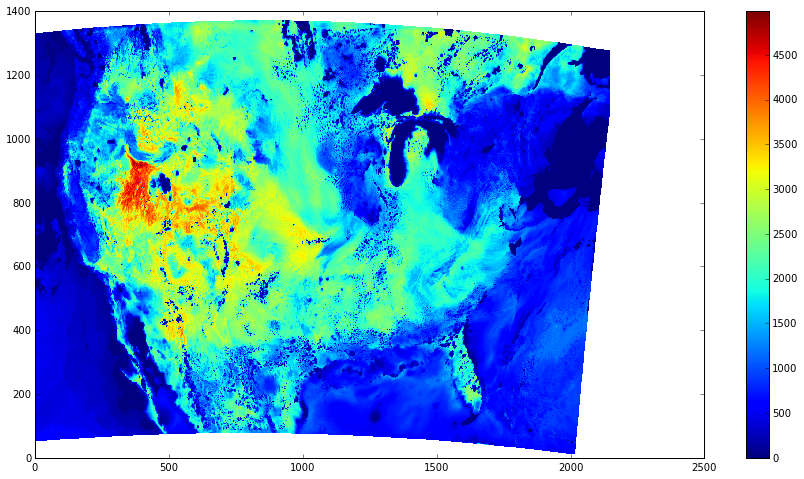

In [39]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-20,1,:,:])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11ece3098>

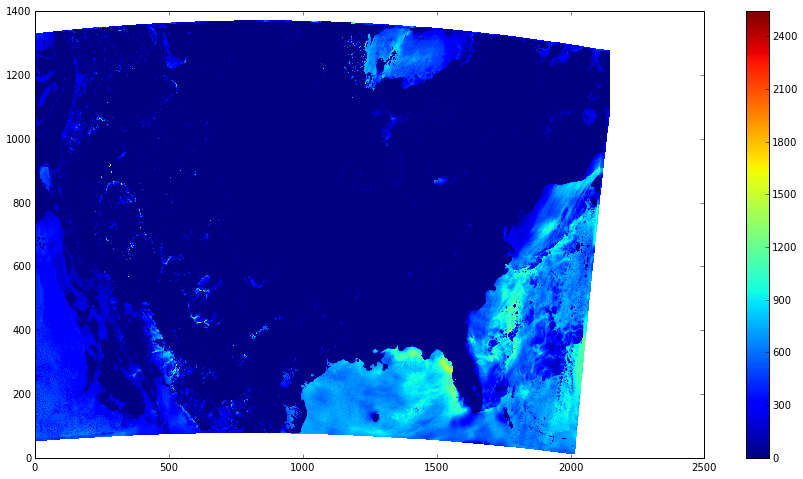

In [9]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-1,-1,:,:])
plt.colorbar()

In [10]:
today = hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-1,:,:,:]

In [11]:
print(today.shape)

(16, 1377, 2145)


In [12]:
max_pbl = today.max(axis = 0)
print(max_pbl.shape)

(1377, 2145)


<matplotlib.colorbar.Colorbar instance at 0x10fb55a28>

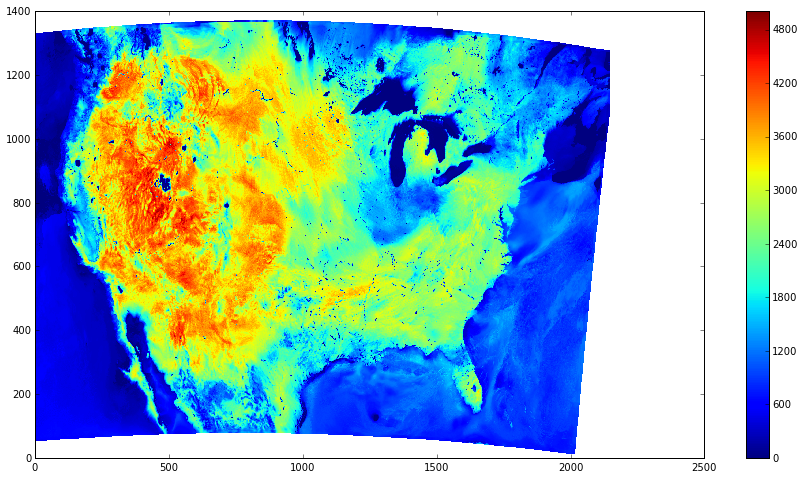

In [13]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(max_pbl)
plt.colorbar()

In [66]:
print(hrrr_dap.variables.keys())
print(hrrr_dap.variables['time'])
print(hrrr_dap.variables['time'][-1])
for dt in netCDF4.num2date(hrrr_dap.variables['time'][-1], hrrr_dap.variables['time'].units):
    print(dt)
datetime.datetime.utcnow().strftime("%a %b %d %H:%M:%S %Z %Y")


[u'x', u'y', u'reftime', u'time', u'isobaric', u'LambertConformal_Projection', u'Cloud_ice_isobaric', u'Graupel_snow_pellets_isobaric', u'Specific_humidity_isobaric', u'Temperature_isobaric', u'Relative_humidity_isobaric', u'u-component_of_wind_isobaric', u'v-component_of_wind_isobaric', u'Geopotential_height_isobaric', u'Dewpoint_temperature_isobaric', u'Vertical_velocity_pressure_isobaric', u'Absolute_vorticity_isobaric', u'Cloud_mixing_ratio_isobaric', u'Rain_mixing_ratio_isobaric', u'Snow_mixing_ratio_isobaric']
<type 'netCDF4.Variable'>
float64 time(reftime, time)
    units: Hour since 2015-06-26T01:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (61, 23)
filling off

[  83.   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.
   95.   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.]
2015-06-29 12:00:00
2015-06-29 13:00:00
20

'Mon Jun 29 15:44:10  2015'

In [16]:
print(hrrr_dap.variables['Temperature_isobaric'].shape)
print(hrrr_dap.variables.keys())

(60, 23, 40, 1059, 1799)
[u'x', u'y', u'reftime', u'time', u'isobaric', u'LambertConformal_Projection', u'Cloud_ice_isobaric', u'Graupel_snow_pellets_isobaric', u'Specific_humidity_isobaric', u'Temperature_isobaric', u'Relative_humidity_isobaric', u'u-component_of_wind_isobaric', u'v-component_of_wind_isobaric', u'Geopotential_height_isobaric', u'Dewpoint_temperature_isobaric', u'Vertical_velocity_pressure_isobaric', u'Absolute_vorticity_isobaric', u'Cloud_mixing_ratio_isobaric', u'Rain_mixing_ratio_isobaric', u'Snow_mixing_ratio_isobaric']


<matplotlib.colorbar.Colorbar instance at 0x110df7830>

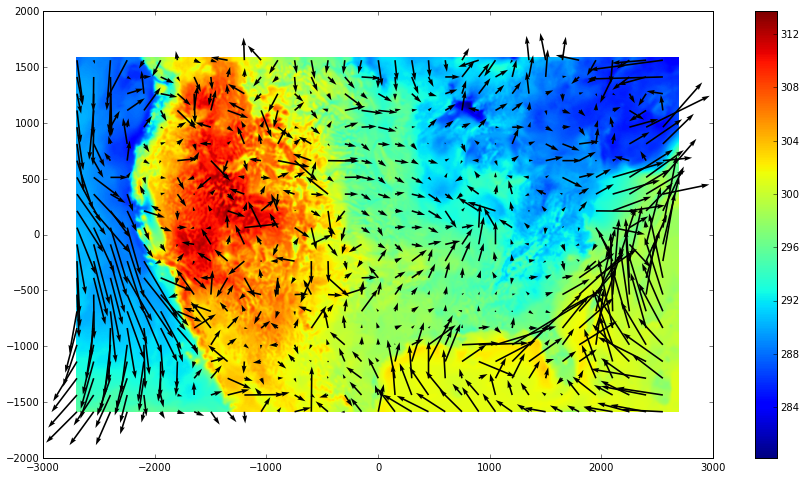

In [43]:
x = hrrr_dap.variables['x'][:]
y = hrrr_dap.variables['y'][:]
samp = 50
x10 = x[::samp]
y10 = y[::samp]        
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(x, y, hrrr_dap.variables['Temperature_isobaric'][-1,0,-1,:,:])
qp = plt.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-1,0,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-1,0,-1,::samp,::samp],
               scale = 100.)
plt.colorbar(mappable = pc)

In [28]:
def dap_lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)
 

In [33]:
lon, lat = dap_lat_lons(hrrr_dap)
print(lat.shape)

(1059, 1799)


In [87]:
print(netCDF4.num2date(hrrr_dap.variables['time'][-14, 1], hrrr_dap.variables['time'].units))
print(netCDF4.num2date(hrrr_dap_sfc.variables['time'][-19, 1], hrrr_dap_sfc.variables['time'].units))


2015-06-28 21:00:00
2015-06-28 21:00:00


<matplotlib.colorbar.Colorbar instance at 0x23eda0440>

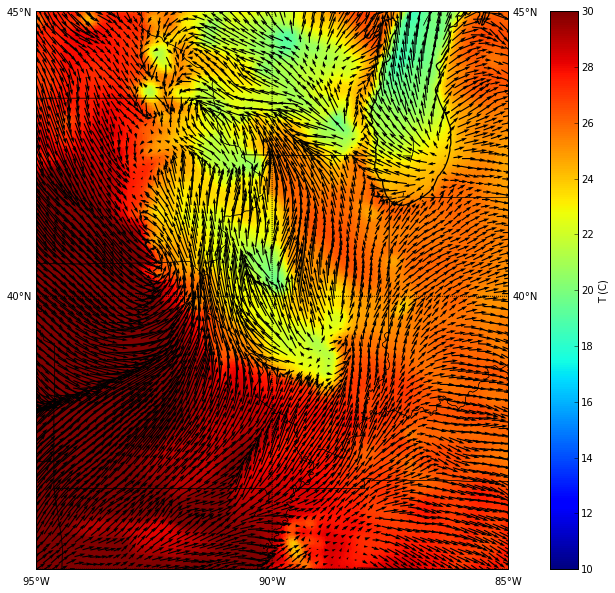

In [91]:
f = plt.figure(figsize = [15,10])
m = Basemap(llcrnrlon = -95,llcrnrlat = 35, urcrnrlon = -85,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
my_mesh = m.pcolormesh(x, y, 
                       hrrr_dap.variables['Temperature_isobaric'][-14,1,-1,:,:]-273.15,
                       vmin = 10, vmax = 30.)

samp = 5
x10 = x[::samp, ::samp]
y10 = y[::samp, ::samp]

qp = m.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                scale = 100)

my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plt.colorbar(label='T (C)', mappable = my_mesh)   

<matplotlib.colorbar.Colorbar instance at 0x23ee30b00>

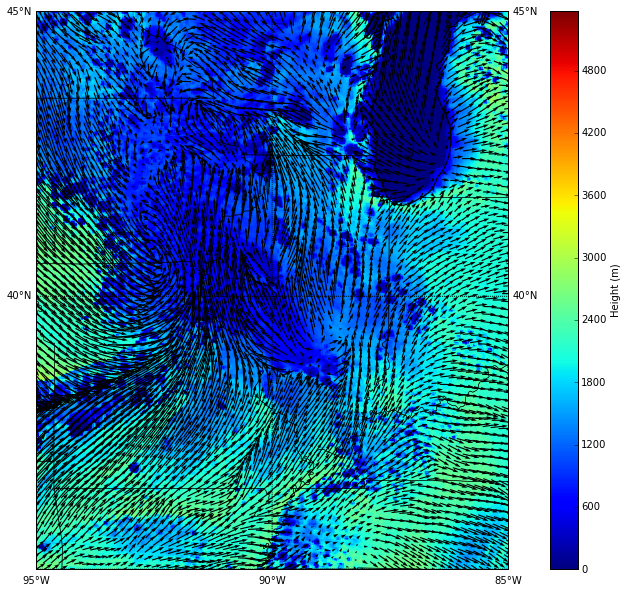

In [90]:
slon, slat = dap_lat_lons(hrrr_dap_sfc)

f = plt.figure(figsize = [15,10])
m = Basemap(llcrnrlon = -95,llcrnrlat = 35, urcrnrlon = -85,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
sx, sy = m(slon, slat)
my_mesh = m.pcolormesh(sx, sy, 
                       hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-19,1,:,:])

samp = 5
x10 = x[::samp, ::samp]
y10 = y[::samp, ::samp]

qp = m.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                scale = 100)

my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plt.colorbar(label='Height (m)', mappable = my_mesh)   

<matplotlib.colorbar.Colorbar instance at 0x1b55b4b48>

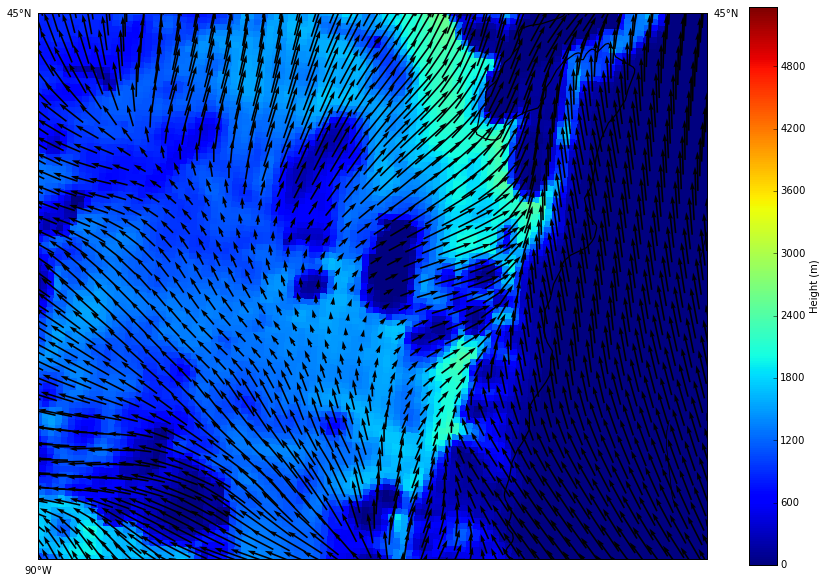

In [89]:
slon, slat = dap_lat_lons(hrrr_dap_sfc)

f = plt.figure(figsize = [15,10])
m = Basemap(llcrnrlon = -90,llcrnrlat = 43, urcrnrlon = -87,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
sx, sy = m(slon, slat)
my_mesh = m.pcolormesh(sx, sy, 
                       hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-19,1,:,:])

samp = 2
x10 = x[::samp, ::samp]
y10 = y[::samp, ::samp]

qp = m.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                scale = 80)

my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plt.colorbar(label='Height (m)', mappable = my_mesh)   

<matplotlib.colorbar.Colorbar instance at 0x22310b050>

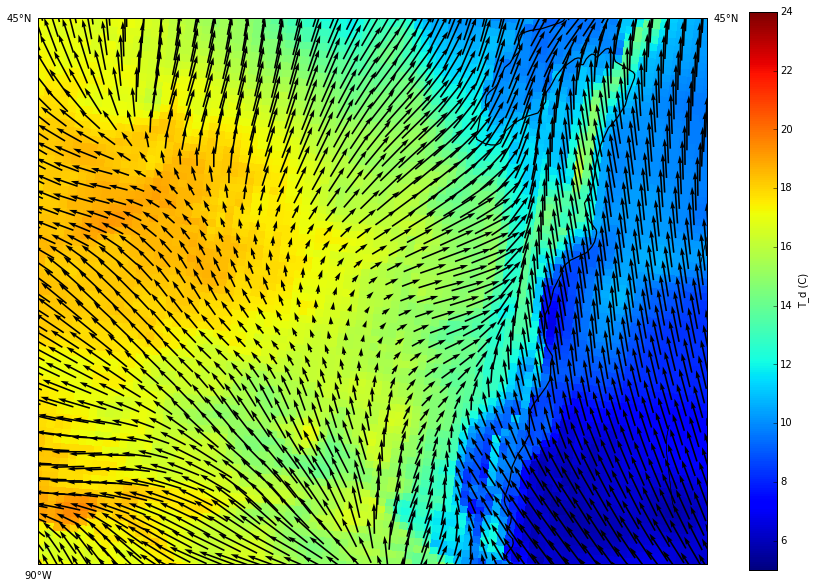

In [93]:
slon, slat = dap_lat_lons(hrrr_dap_sfc)

f = plt.figure(figsize = [15,10])
m = Basemap(llcrnrlon = -90,llcrnrlat = 43, urcrnrlon = -87,
               urcrnrlat = 45 , projection = 'mill', area_thresh =1000 ,
               resolution='h')
x, y = m(lon, lat)
sx, sy = m(slon, slat)
my_mesh = m.pcolormesh(x, y, 
                       hrrr_dap.variables['Dewpoint_temperature_isobaric'][-14,1, -1,:,:] -273 , vmin = 5, vmax = 24)

samp = 2
x10 = x[::samp, ::samp]
y10 = y[::samp, ::samp]

qp = m.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-14,1,-1,::samp,::samp],
                scale = 80)

my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plt.colorbar(label='T_d (C) ', mappable = my_mesh)   

In [57]:
print(hrrr_dap.variables['isobaric'][:])

[   5000.    7500.   10000.   12500.   15000.   17500.   20000.   22500.
   25000.   27500.   30000.   32500.   35000.   37500.   40000.   42500.
   45000.   47500.   50000.   52500.   55000.   57500.   60000.   62500.
   65000.   67500.   70000.   72500.   75000.   77500.   80000.   82500.
   85000.   87500.   90000.   92500.   95000.   97500.  100000.  101320.]
